# Comprehensive EDA on Items:



In this notebook we analyze the article descriptions since one of our methods for recommendation systems are based on Description Similarity:

In [6]:
#import some libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path  
from matplotlib.pyplot import figure
import os
import seaborn as sns
import plotly.express as px
from termcolor import colored
import cv2
import nltk
nltk.download('stopwords')
from wordcloud import WordCloud, STOPWORDS
from nltk.corpus import stopwords
import re
import pandas as pd
import string

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\molla\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# Loading the data:

In [7]:
#the Article datafrae which we saved after EDA-1
Article=pd.read_csv('C:/Users/molla/Capstone/Article.csv')

In [8]:
#check
Article.head()

,Unnamed: 0,article_id,prod_name,product_type_name,product_group_name,graphical_appearance_name,colour_group_name,perceived_colour_value_name,perceived_colour_master_name,department_name,index_name,index_group_name,section_name,garment_group_name,detail_desc
0,0,108775015,Strap top,Vest top,Garment Upper body,Solid,Black,Dark,Black,Jersey Basic,Ladieswear,Ladieswear,Womens Everyday Basics,Jersey Basic,Jersey top with narrow shoulder straps.
1,1,108775044,Strap top,Vest top,Garment Upper body,Solid,White,Light,White,Jersey Basic,Ladieswear,Ladieswear,Womens Everyday Basics,Jersey Basic,Jersey top with narrow shoulder straps.
2,2,108775051,Strap top (1),Vest top,Garment Upper body,Stripe,Off White,Dusty Light,White,Jersey Basic,Ladieswear,Ladieswear,Womens Everyday Basics,Jersey Basic,Jersey top with narrow shoulder straps.
3,3,110065001,OP T-shirt (Idro),Bra,Underwear,Solid,Black,Dark,Black,Clean Lingerie,Lingeries/Tights,Ladieswear,Womens Lingerie,"Under-, Nightwear","Microfibre T-shirt bra with underwired, moulde..."
4,4,110065002,OP T-shirt (Idro),Bra,Underwear,Solid,White,Light,White,Clean Lingerie,Lingeries/Tights,Ladieswear,Womens Lingerie,"Under-, Nightwear","Microfibre T-shirt bra with underwired, moulde..."


In [9]:
#dropping the unnamed column
Article.drop(columns=['Unnamed: 0'],inplace=True)

In [10]:
#check
Article.head()

,article_id,prod_name,product_type_name,product_group_name,graphical_appearance_name,colour_group_name,perceived_colour_value_name,perceived_colour_master_name,department_name,index_name,index_group_name,section_name,garment_group_name,detail_desc
0,108775015,Strap top,Vest top,Garment Upper body,Solid,Black,Dark,Black,Jersey Basic,Ladieswear,Ladieswear,Womens Everyday Basics,Jersey Basic,Jersey top with narrow shoulder straps.
1,108775044,Strap top,Vest top,Garment Upper body,Solid,White,Light,White,Jersey Basic,Ladieswear,Ladieswear,Womens Everyday Basics,Jersey Basic,Jersey top with narrow shoulder straps.
2,108775051,Strap top (1),Vest top,Garment Upper body,Stripe,Off White,Dusty Light,White,Jersey Basic,Ladieswear,Ladieswear,Womens Everyday Basics,Jersey Basic,Jersey top with narrow shoulder straps.
3,110065001,OP T-shirt (Idro),Bra,Underwear,Solid,Black,Dark,Black,Clean Lingerie,Lingeries/Tights,Ladieswear,Womens Lingerie,"Under-, Nightwear","Microfibre T-shirt bra with underwired, moulde..."
4,110065002,OP T-shirt (Idro),Bra,Underwear,Solid,White,Light,White,Clean Lingerie,Lingeries/Tights,Ladieswear,Womens Lingerie,"Under-, Nightwear","Microfibre T-shirt bra with underwired, moulde..."


In [13]:
#joining all the columns to the description column using lambda function and join (join with ',' seperator)

Article['Description'] = Article[Article.columns[1:]].apply(
    lambda x: ','.join(x.astype(str)),
    axis=1
)

In [16]:
#define a function which exclude the stop words and any words with less than 2 characters
def preprocess(text):
    ''' keeping only the words which are not in stop_words list '''
    result = []
    for token in gensim.utils.simple_preprocess(text) :
        if  len(token) > 1:
            result.append(token)
            
    return ' '.join(result)

In [17]:
#define a new dataframe with just article id and article description
article2 = Article[['article_id','Description']].copy()

## Preprocessing the article Description

In [18]:
#As we had (1) in some of the columns We will replace these with " "

article2['Description']= article2['Description'].apply(lambda string:  re.sub( "(1)"," ",string))

In [19]:
#also the paranthesis
article2['Description']= article2['Description'].apply(lambda string:  re.sub( "[()]"," ",string))

In [20]:
#changing the ids type to int 32 to reserve less memory
article2['article_id'] = article2['article_id'].astype('int32')

In [21]:
#applying the preprocess function we defined
article2['Description'] = article2['Description'].apply(preprocess)

In [22]:
#checking
article2.head()

,article_id,Description
0,108775015,strap top vest top garment upper body solid bl...
1,108775044,strap top vest top garment upper body solid wh...
2,108775051,strap top vest top garment upper body stripe o...
3,110065001,op shirt idro bra underwear solid black dark b...
4,110065002,op shirt idro bra underwear solid white light ...


## Making a Worldcloud of the Description:

In [23]:
#joining all the descriptions in the description column and name it text
text = " ".join(cat.split()[1] for cat in article2.Description)

In [24]:
#generating worldcloud out of that text
word_cloud = WordCloud(collocations = False, background_color = 'black').generate(text)

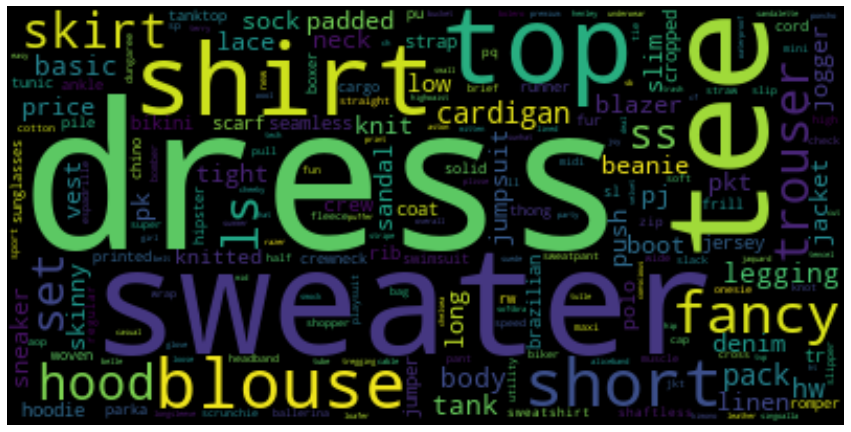

In [28]:
#showing the worldcloud as an image
#imshow(): imshow function will display the image
#interpolation=”bilinear”: used to display smoother image.
plt.figure(figsize=(15,10))
plt.imshow(word_cloud, interpolation='bilinear')

#no axis needed
plt.axis("off")

plt.show()

# Figure 1

In [29]:
#import this library to open the image
from PIL import Image

In [30]:
#mask the wordcloud with any image 
mask = np.array(Image.open("maskable.jpg"))

In [31]:
#adding the mask
word_cloud = WordCloud(collocations = False, background_color = 'white', mask=mask).generate(text)

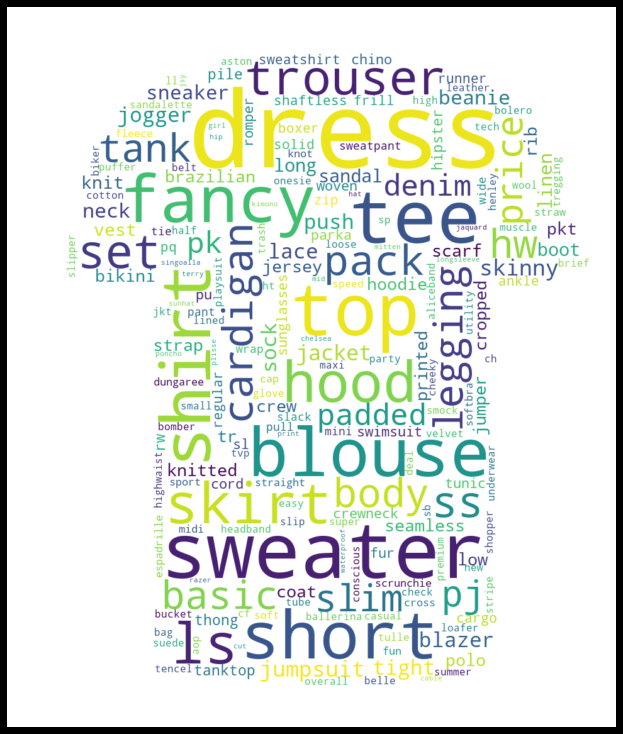

In [34]:
#figuresize
plt.figure(figsize=(15,10),facecolor="k")

#no need for axis
plt.axis("off")

#tight_layout automatically adjusts subplot params so that the subplot fits in to the figure area
plt.tight_layout(pad=0)

#showing
plt.imshow(word_cloud, interpolation='bilinear')

#saving the file
word_cloud.to_file("tshirt.jpg")

plt.show()


# Figure 2

# CounTVectorizing the Description:

We decided to countvectorize the description to see the frequent tokens and the top N frequent tokens of all the items description.

In [37]:
#defining a function for tokenizing

nltk.download('stopwords')
from nltk.corpus import stopwords 

ENGLISH_STOP_WORDS = stopwords.words('english')

def my_tokenizer(sentence):
    # remove punctuation and set to lower case
    for punctuation_mark in string.punctuation:
        sentence = sentence.replace(punctuation_mark,'').lower()

    # split sentence into words
    listofwords = sentence.split(' ')
    listofstemmed_words = []
    
    # remove stopwords and any tokens that are just empty strings
    for word in listofwords:
        if (not word in ENGLISH_STOP_WORDS) and (word!=''):
            # Stem words
            stemmer = nltk.stem.PorterStemmer()
            stemmed_word = stemmer.stem(word)
            listofstemmed_words.append(stemmed_word)

    return listofstemmed_words

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\molla\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [38]:
from sklearn.feature_extraction.text import CountVectorizer

#Defining a function to get the top N words which is from
# https://medium.com/analytics-vidhya/automated-keyword-extraction-from-articles-using-nlp-bfd864f41b34
def get_top_n_words(corpus, n=None):
    vec=CountVectorizer(tokenizer=my_tokenizer).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]


#top 20 words
common_tokens= get_top_n_words(article2['Description'],20)

#make a dataframe with top 20 words
df_tokens_description = pd.DataFrame(common_tokens, columns = ['Token', 'count'])

In [39]:
#checking
df_tokens_description

,Token,count
0,jersey,170506
1,bodi,156220
2,garment,155216
3,dark,132508
4,ladieswear,131476
5,babi,130272
6,children,121174
7,light,117030
8,top,103458
9,solid,103216


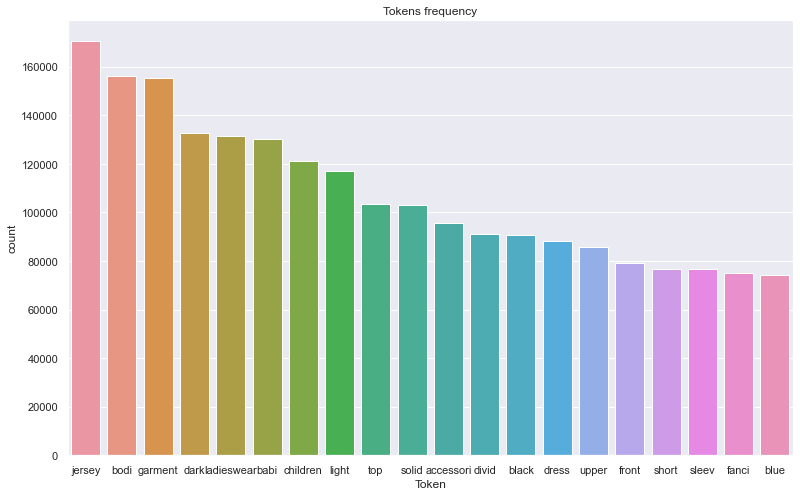

In [49]:
#bar plot with seaborn
sns.set(rc={'figure.figsize':(13,8)})

#data from the dataframe and x axis is the tokens y axis is the counts
g = sns.barplot(x="Token", y="count", data=df_tokens_description).set(title='Tokens frequency')





# Figure 3:

Jersey, bodi and garment are the top 3 frequent tokens among the articles' descriptions.

In [53]:

d={'article_id':article2['article_id'],'description':article2['Description']}
new_article=pd.DataFrame(data=d)

In [54]:
new_article.head()

,article_id,description
0,108775015,strap top vest top garment upper body solid bl...
1,108775044,strap top vest top garment upper body solid wh...
2,108775051,strap top vest top garment upper body stripe o...
3,110065001,op shirt idro bra underwear solid black dark b...
4,110065002,op shirt idro bra underwear solid white light ...


In [55]:
new_article.to_csv('Article_Description.csv')